In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_excel('monthly_ratable_2022_2023.xlsx')

In [11]:
print(df)

        Month   Ratable
0  2021-08-01  0.547219
1  2021-09-01  0.540551
2  2021-10-01  0.566417
3  2021-11-01  0.565013
4  2021-12-01  0.534166
5  2022-01-01  0.577509
6  2022-02-01  0.545174
7  2022-03-01  0.575600
8  2022-04-01  0.534673
9  2022-05-01  0.602270
10 2022-06-01  0.534208
11 2022-07-01  0.574968
12 2022-08-01  0.605314
13 2022-09-01  0.564620
14 2022-10-01  0.576556
15 2022-11-01  0.554050
16 2022-12-01  0.624813
17 2023-01-01  0.607873
18 2023-02-01  0.582743
19 2023-03-01  0.602458
20 2023-04-01  0.606679
21 2023-05-01  0.585088
22 2023-06-01  0.596472
23 2023-07-01  0.655333


In [14]:
df.head()

,Month,Ratable
0,2021-08-01,0.547219
1,2021-09-01,0.540551
2,2021-10-01,0.566417
3,2021-11-01,0.565013
4,2021-12-01,0.534166


In [15]:
# inplace= True means the original df will be changed whereas False, the new df created with index
df.set_index('Month',inplace=True) 

In [17]:
df.head()

,Ratable
Month,
2021-08-01,0.547219
2021-09-01,0.540551
2021-10-01,0.566417
2021-11-01,0.565013
2021-12-01,0.534166


In [18]:
df.describe()

,Ratable
count,24.000000
mean,0.577490
std,0.031238
min,0.534166
25%,0.552342
50%,0.576078
75%,0.602317
max,0.655333


<Axes: xlabel='Month'>

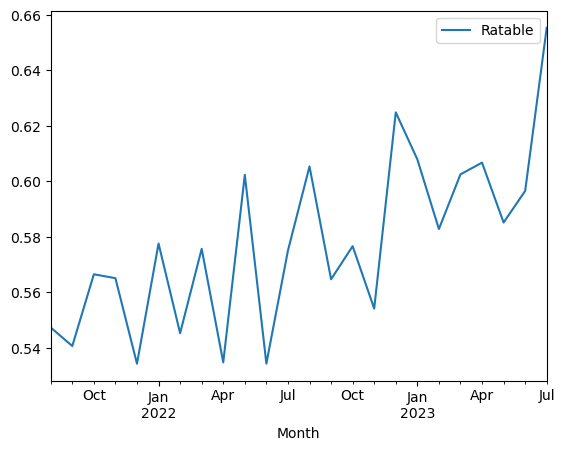

In [19]:
#Step 2. Visualize the Data
df.plot()

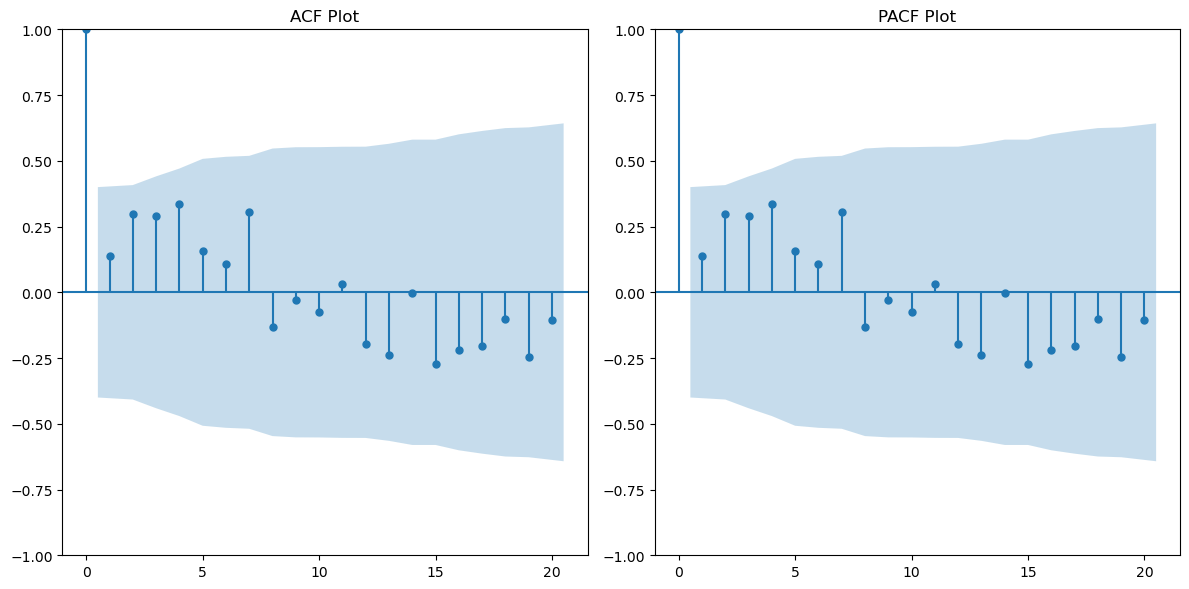

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [21]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [22]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [23]:
adfuller_test(df['Ratable'])

ADF Test Statistic:0.639708499222811
p-value:0.9885545597413118
#Lags Used:6
Number of Observations Used:17
Weak evidence against null hypo


In [48]:
# Make the data Stationary
df['Seasonal First Difference']= df['Ratable']-df['Ratable'].shift(2) # 2 lags used to transform the data stationary
adfuller_test(df['Seasonal First Difference'].dropna()) 
#The ADF test cannot be performed on data containing NaN values, hence dropna

ADF Test Statistic:-5.656391376943717
p-value:9.599223593063056e-07
#Lags Used:9
Number of Observations Used:12
Strong evidence against null hypo


In [49]:
### For non-seasonal data
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Ratable'],order=(1,1,1))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
train_data=model.fit()

<Axes: xlabel='Month'>

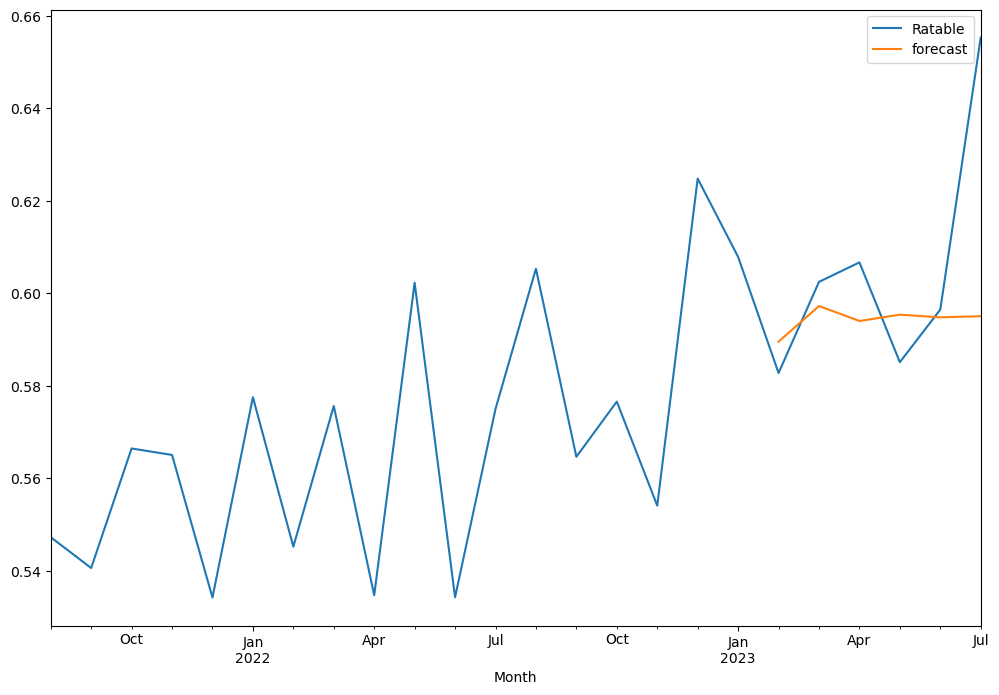

In [56]:
df['forecast']=train_data.predict(start=18, end = 24, dynamic=True) # testing the model performance with sample input
df[['Ratable','forecast']].plot(figsize=(12,8))

In [66]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,16)] # Creating future weeks- 15 months placeholder

In [67]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Month'

In [68]:
future_dataset_df

,Ratable,Seasonal First Difference,Seasonal Second Difference,forecast
Month,,,,
2023-08-01,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN


In [69]:
future_df=pd.concat([df,future_dataset_df])

/var/folders/qg/9qnm2g51701gxcxzzwr1q97c0000gn/T/ipykernel_14247/674726799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: xlabel='Month'>

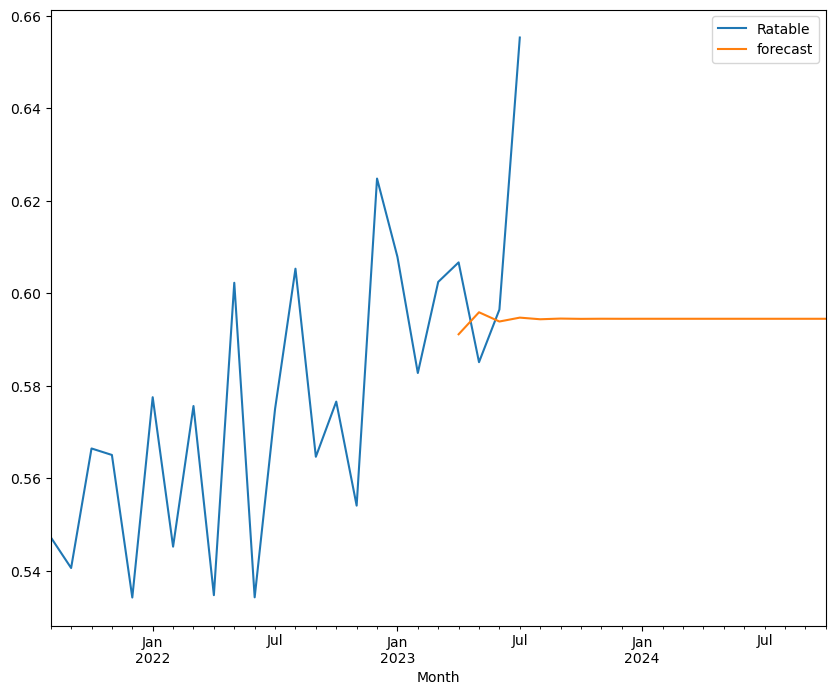

In [71]:
future_df['forecast']=train_data.predict(start=20, end=40, dynamic=True)
future_df[['Ratable','forecast']].plot(figsize=(10,8))

In [72]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

             Ratable  Seasonal First Difference  Seasonal Second Difference  \
Month                                                                         
2023-04-01  0.606679                   0.023936                   -0.030016   
2023-05-01  0.585088                  -0.017369                    0.042019   
2023-06-01  0.596472                  -0.010207                   -0.070224   
2023-07-01  0.655333                   0.070245                    0.095680   
2023-08-01       NaN                        NaN                         NaN   
2023-09-01       NaN                        NaN                         NaN   
2023-10-01       NaN                        NaN                         NaN   
2023-11-01       NaN                        NaN                         NaN   
2023-12-01       NaN                        NaN                         NaN   
2024-01-01       NaN                        NaN                         NaN   
2024-02-01       NaN                        NaN     

In [73]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1_selected_cols=future_df1[['Ratable','forecast']]

# Remove the time part from the index by formatting it as date only
future_df1_selected_cols.index = future_df1_selected_cols.index.strftime('%Y-%m-%d')

future_df1_selected_cols.to_excel('output3Y.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


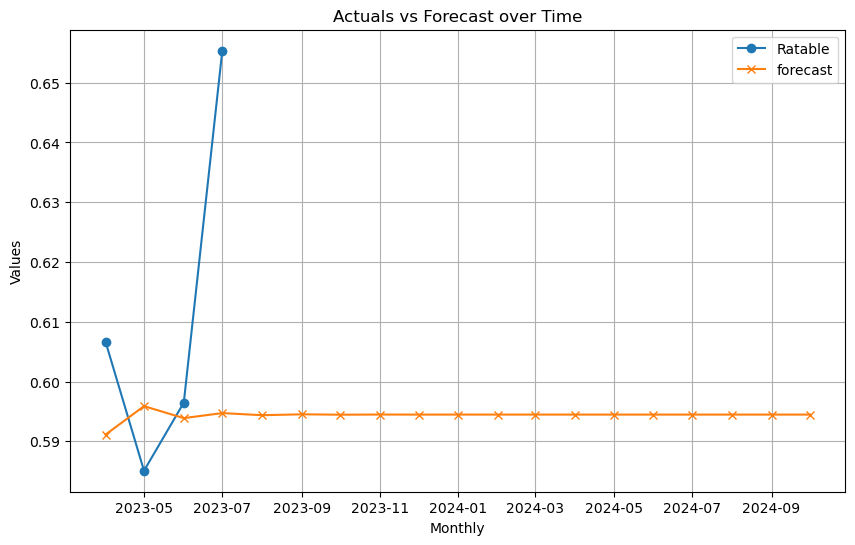

In [74]:
# Plot the Actuals vs Forecast

plt.figure(figsize=(10, 6))
plt.plot(future_df1.index, future_df1['Ratable'], label='Ratable', marker='o')
plt.plot(future_df1.index, future_df1['forecast'], label='forecast', marker='x')

# Customize the graph
plt.title('Actuals vs Forecast over Time')
plt.xlabel('Monthly')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper right')

# Save the plot to a PNG file. Needs to save first before showing the plot
plt.savefig('actuals_forecast_2022_2025.png')

# Show the plot in Jupyter Notebook
plt.show()

In [75]:
import openpyxl
from openpyxl.drawing.image import Image

# Load the workbook and select the active worksheet
wb = openpyxl.load_workbook('output3Y.xlsx')
ws = wb.active #worksheet activated 

# Add the saved image to the worksheet
img = Image('actuals_forecast_2022_2025.png')
ws.add_image(img, 'G5')  # Insert the image starting from cell G5

# Save the updated Excel file
wb.save('actuals_forecast_2022_2025.xlsx')

In [76]:
### Draw Line chart graph in excel and save it.

import xlsxwriter

# Create an Excel writer object and use xlsxwriter as the engine
with pd.ExcelWriter('output3Y.xlsx', engine='xlsxwriter') as writer:
    
    
    # Write the DataFrame to Excel
    future_df1_selected_cols.to_excel(writer, sheet_name='Sheet2', index=True)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet2']
    
    # Create a chart object (line chart)
    chart = workbook.add_chart({'type': 'line'})

    # Configure the first series (Actuals)
    chart.add_series({
        'name': 'Ratable',
        'categories': ['Sheet2', 1, 0, 20, 0],  # (sheet_name, start_row=1, start_col=0 always, end_row=42, end_col=0 always)
        'values': ['Sheet2', 1, 1, 20, 1],      # (sheet_name, start_row=1, start_col=1, end_row=42, end_col)
    })

    # Configure the second series (Forecast)
    chart.add_series({
        'name': 'forecast',
        'categories': ['Sheet2', 1, 0, 20, 0],  # Date column for categories
        'values': ['Sheet2', 1, 2, 20, 2],      # Forecast values (row 1 to 42, column 2)
    })

    # Add a chart title and axis labels
    chart.set_title({'name': 'Actuals vs Forecast'})
    chart.set_x_axis({'name': 'Weekly'})
    chart.set_y_axis({'name': 'Values'})
    
    # Set a fixed size for the chart (width and height in pixels)
    chart.set_size({'width': 1000, 'height': 600})  # You can adjust these values
    
    # Insert the chart into the worksheet
    worksheet.insert_chart('E2', chart)
    
    print('Yes the file is downloading...')

Yes the file is downloading...
